In [2]:
#cleaning function to use the data.
def load_data():
    data_list = []
    for line in open('position_injury_player_2019_2020_fixed.csv'):
        line_cleaned = line.strip()
        list_cleaned = line_cleaned.split(',')
        data_list.append(list_cleaned)
    return data_list

In [3]:
data = load_data()
#a function analyzing how many injuires a team had.
def counting_injuries(data, team):
    count = 0
    for line in data:
        if line[24] == team:
            count += 1
    return count

counting_injuries(data, "ARI")
    

37

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

injury_data = pd.read_csv('game_injury_player_2019_2020_complete_update_vegas_weeks_bucketed_lower_body.csv')

# Rename the column 'num_injuries' to 'num_past_injuries' based on assumption that it represents number of past injuries a player had.
injury_data.rename(columns={'num_injuries':'num_past_injuries'}, inplace=True)

# Create a new column 'stadium_type' based on the 'dome' column to better represent data for visualization.
def dome_column_replace(dome):
    if dome:
        return "Dome"
    else:
        return "Open Air"
injury_data['stadium_type'] = injury_data['dome'].apply(dome_column_replace)

# Create a new column 'total_pts' that sums up the points scored by both teams in a game.
injury_data['total_pts'] = injury_data['pts_w'] + injury_data['pts_l']

# Create a new column 'home_or_away' to indicate whether the injured team was playing at home or away.
def injuries_by_home_or_away(injured_team, home_team, away_team):
    if injured_team == home_team:
        return 'Home'
    else:
        return 'Away'
injury_data['home_or_away'] = injury_data.apply(lambda row: injuries_by_home_or_away(row['injured_team'], row['home_team'], row['away_team']), axis=1)

# Average position injury weight function to create a dictionary and show average injury weight by position.
def avg_position_injury_weight():
    avg_weight = {}
    for position in injury_data['position'].unique():
        avg_weight[position] = round(injury_data[injury_data['position'] == position]['weight'].mean())
    return avg_weight


# Average weight function to create a new column 'avg_position_weight' based on position.
def avg_position_weight(row):
    # Average weight data from https://oddspedia.com/insights/american-football/how-tall-is-the-average-nfl-player-average-height-nfl-players#average-heights-and-weights-for-every-nfl-position
    if row.position == 'QB':
        return 220
    elif row.position == 'RB':
        return 213
    elif row.position == 'WR':
        return 199
    elif row.position == 'TE':
        return 244
    elif row.position == 'OL':
        return 313
    elif row.position == 'DL':
        return 270
    elif row.position == 'LB':
        return 240
    elif row.position == 'DB':
        return (192+203)/2
    
# Limitation: average weight data was not available from 2019/2020 seasons, so most recent data available was used.
injury_data['avg_position_weight'] = injury_data.apply(avg_position_weight, axis=1)

In [5]:
# (rows, columns) of dataframe.
injury_data.shape

(805, 86)

In [6]:
# First five rows of dataframe.
injury_data.head()

,connector,player_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,distance_miles,HOME_day_since_last_game,AWAY_day_since_last_game,spread_line,total_line,weeks_bucketed,stadium_type,total_pts,home_or_away,avg_position_weight
0,2019_01_ATL_MIN_McKinley,2019_ATL_98_McKinley,2019_01_ATL_MIN,MIN,ATL,REG,1,MIN,home,ATL,...,906.980256,0,0,3.5,47.0,1,Dome,40,Away,270.0
1,2019_01_BAL_MIA_Smith,2019_BAL_22_Smith,2019_01_BAL_MIA,MIA,BAL,REG,1,MIA,home,BAL,...,949.274391,0,0,-7.0,41.0,1,Dome,69,Away,197.5
2,2019_01_BUF_NYJ_Poole,2019_NYJ_34_Poole,2019_01_BUF_NYJ,NYJ,BUF,REG,1,BUF,away,NYJ,...,277.575071,0,0,2.5,41.0,1,Open Air,33,Home,197.5
3,2019_01_CIN_SEA_Britt,2019_SEA_68_Britt,2019_01_CIN_SEA,SEA,CIN,REG,1,SEA,home,CIN,...,1966.864410,0,0,9.5,44.0,1,Open Air,41,Home,313.0
4,2019_01_DET_ARI_Melvin,2019_DET_29_Melvin,2019_01_DET_ARI,ARI,DET,REG,1,ARI,home,DET,...,1694.403877,0,0,-2.5,45.5,1,Dome,54,Away,197.5


In [7]:
# Columns of dataframe.
injury_data.columns

Index(['connector', 'player_id', 'game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field.x', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'qtr', 'down', 'yrdln',
       'ydstogo', 'injured_first_name', 'injured_last_name', 'injured_team',
       'injured_player_num', 'contact_noncontact', 'injury_area',
       'player_role', 'season', 'team', 'position', 'depth_chart_position',
       'jersey_number', 'status', 'full_name', 'first_name', 'last_name',
       'birth_date', 'height', 'weight', 'college', 'years_exp', 'game_type',
       'football_name', 'entry_year', 'day', 'date', 'time', 'winner.tie',
       'loser.tie', 'pts_w', 'pts_l', 'yds_w', 'tov_w', 'yds_l', 'tov_l',
       'loser_is_home', 'Home_Team', 'Away_Team', 'Home_abbr', 'Away_abbr',
       'num_past_injuries', 'num_plays', 'surface', 'surface_type', 'stadium',


In [8]:
# Filters data to show only the rows and columns wherere team is " " and position is " ".
injury_data.loc[(injury_data['team'] == "BUF") & (injury_data['position'] == "WR")]

,connector,player_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,distance_miles,HOME_day_since_last_game,AWAY_day_since_last_game,spread_line,total_line,weeks_bucketed,stadium_type,total_pts,home_or_away,avg_position_weight
198,2019_12_DEN_BUF_Beasley,2019_BUF_10_Beasley,2019_12_DEN_BUF,BUF,DEN,REG,12,BUF,home,DEN,...,1366.694897,7,7,3.5,37.0,3,Open Air,23,Home,199.0
199,2019_12_DEN_BUF_Foster,2019_BUF_16_Foster,2019_12_DEN_BUF,BUF,DEN,REG,12,BUF,home,DEN,...,1366.694897,7,7,3.5,37.0,3,Open Air,23,Home,199.0
572,2020_10_BUF_ARI_Brown,2020_BUF_15_Brown,2020_10_BUF_ARI,ARI,BUF,REG,10,BUF,away,ARI,...,1913.039783,7,7,3.0,55.5,3,Dome,62,Away,199.0


In [41]:
# Filters data to show only postseason rows.
injury_data.loc[injury_data['season_type'] != 'REG']

,connector,player_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,distance_miles,HOME_day_since_last_game,AWAY_day_since_last_game,spread_line,total_line,weeks_bucketed,stadium_type,total_pts,home_or_away,avg_position_weight
337,2019_18_BUF_HOU_Addae,2019_HOU_37_Addae,2019_18_BUF_HOU,HOU,BUF,POST,18,BUF,away,HOU,...,1290.170999,6,6,2.5,43.0,5,Dome,41,Home,197.5
338,2019_18_MIN_NO_Alonso,2019_NO_54_Alonso,2019_18_MIN_NO,NO,MIN,POST,18,MIN,away,NO,...,1052.365951,7,7,7.5,50.0,5,Dome,46,Home,240.0
339,2019_18_MIN_NO_Peat,2019_NO_75_Peat,2019_18_MIN_NO,NO,MIN,POST,18,NO,home,MIN,...,1052.365951,7,7,7.5,50.0,5,Dome,46,Home,313.0
340,2019_18_MIN_NO_Stephen,2019_MIN_93_Stephen,2019_18_MIN_NO,NO,MIN,POST,18,NO,home,MIN,...,1052.365951,7,7,7.5,50.0,5,Dome,46,Away,270.0
341,2019_18_SEA_PHI_Graham,2019_PHI_55_Graham,2019_18_SEA_PHI,PHI,SEA,POST,18,SEA,away,PHI,...,2374.280551,7,7,1.0,44.0,5,Open Air,26,Home,270.0
342,2019_18_SEA_PHI_Sanders,2019_PHI_26_Sanders,2019_18_SEA_PHI,PHI,SEA,POST,18,PHI,home,SEA,...,2374.280551,7,7,1.0,44.0,5,Open Air,26,Home,213.0
343,2019_18_TEN_NE_Chung,2019_NE_23_Chung,2019_18_TEN_NE,NE,TEN,POST,18,TEN,away,NE,...,925.048966,6,6,4.5,45.0,5,Open Air,33,Home,197.5
344,2019_19_HOU_KC_Clark,2019_HOU_77_Clark,2019_19_HOU_KC,KC,HOU,POST,19,HOU,away,KC,...,649.129005,14,8,10.0,50.5,5,Open Air,82,Away,313.0
345,2019_19_HOU_KC_Johnson,2019_HOU_32_Johnson,2019_19_HOU_KC,KC,HOU,POST,19,KC,home,HOU,...,649.129005,14,8,10.0,50.5,5,Open Air,82,Away,197.5
346,2019_19_SEA_GB_Lazard,2019_GB_13_Lazard,2019_19_SEA_GB,GB,SEA,POST,19,GB,home,SEA,...,1643.718092,14,7,4.5,46.0,5,Open Air,51,Home,199.0


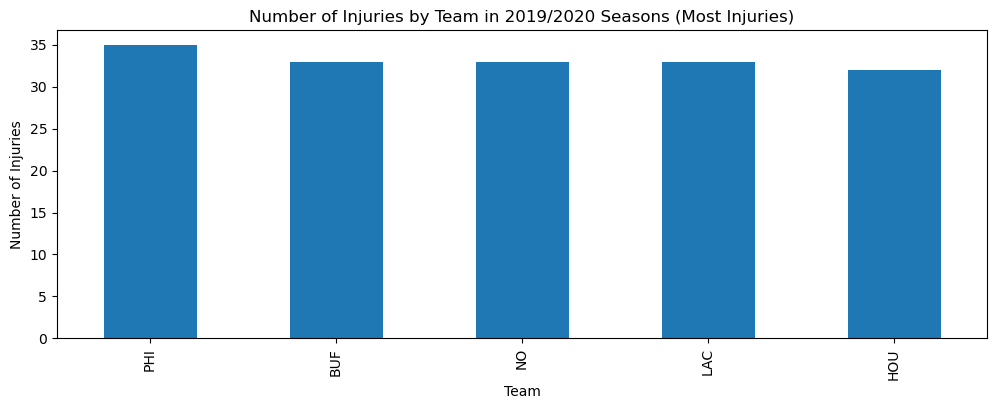

In [ ]:
# Bar chart showing the teams with the most injuries in 2019/2020 seasons.
injury_data.team.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Team in 2019/2020 Seasons (Most Injuries)')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.show()

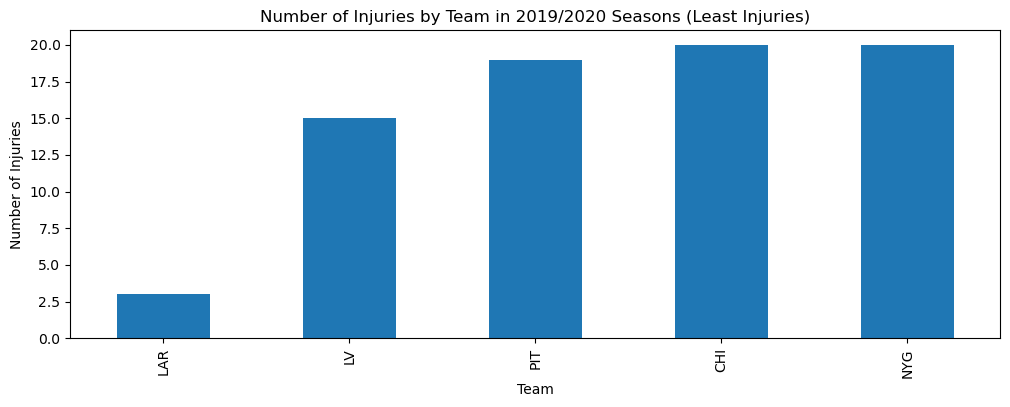

In [ ]:
# Bar chart showing the teams with the least injuries in 2019/2020 seasons.
injury_data.team.value_counts().tail().sort_values(ascending=True).plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Team in 2019/2020 Seasons (Least Injuries)')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.show()

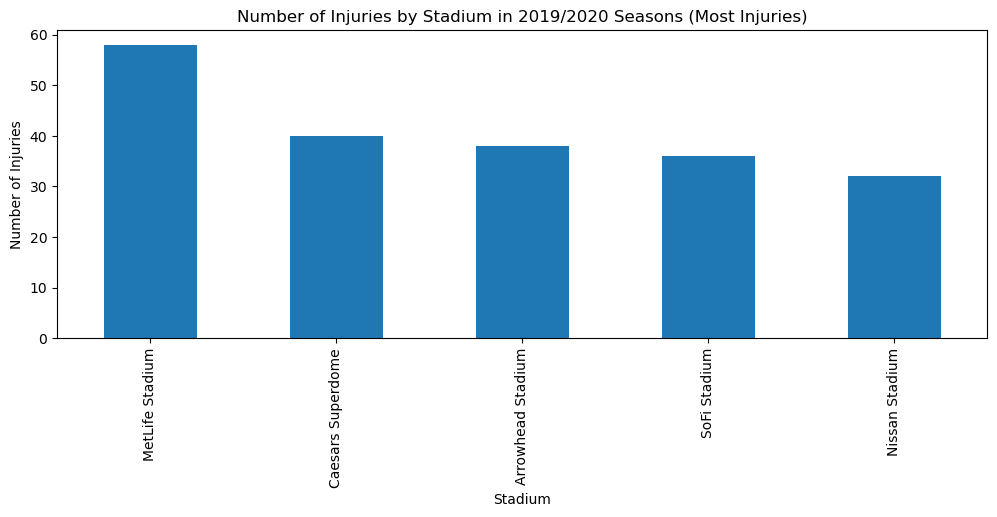

In [ ]:
# Bar chart showing the stadiums with the most injuries in 2019/2020 seasons.
injury_data.stadium.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Stadium in 2019/2020 Seasons (Most Injuries)')
plt.xlabel('Stadium')
plt.ylabel('Number of Injuries')
plt.show()

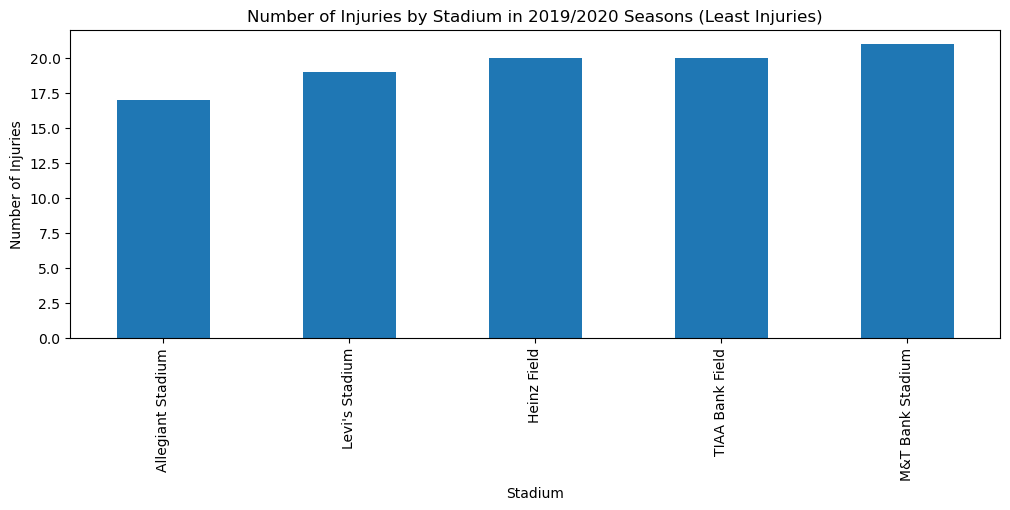

In [ ]:
# Bar chart showing the stadiums with the least injuries in 2019/2020 seasons.
injury_data.stadium.value_counts().tail().sort_values(ascending=True).plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Stadium in 2019/2020 Seasons (Least Injuries)')
plt.xlabel('Stadium')
plt.ylabel('Number of Injuries')
plt.show()

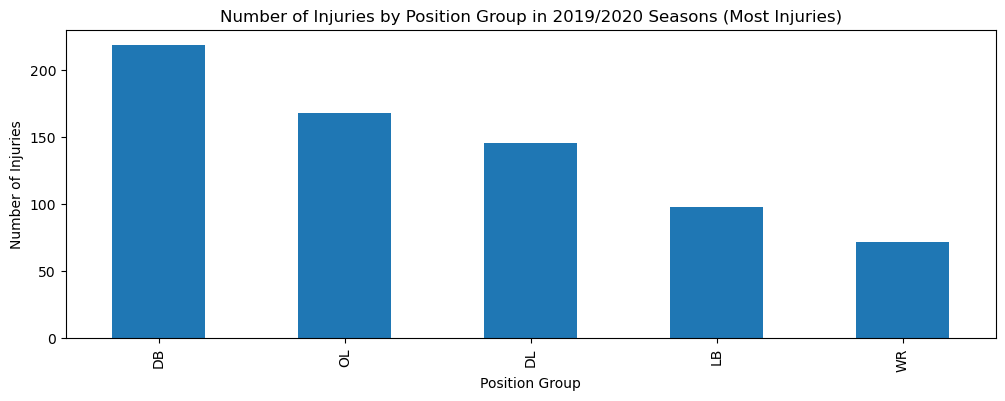

In [ ]:
# Bar chart showing the position groups with the most injuries in 2019/2020 seasons.
injury_data.position.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Position Group in 2019/2020 Seasons (Most Injuries)')
plt.xlabel('Position Group')
plt.ylabel('Number of Injuries')
plt.show()

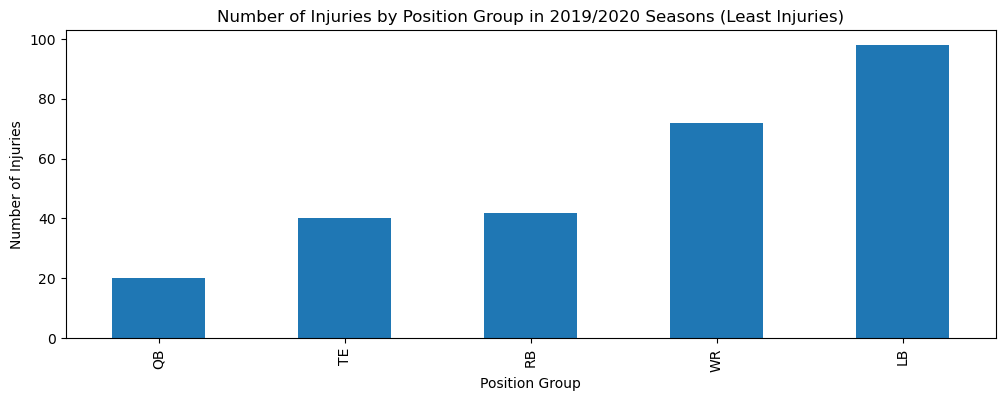

In [ ]:
# Bar chart showing the position groups with the least injuries in 2019/2020 seasons.
injury_data.position.value_counts().tail().sort_values(ascending=True).plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Position Group in 2019/2020 Seasons (Least Injuries)')
plt.xlabel('Position Group')
plt.ylabel('Number of Injuries')
plt.show()

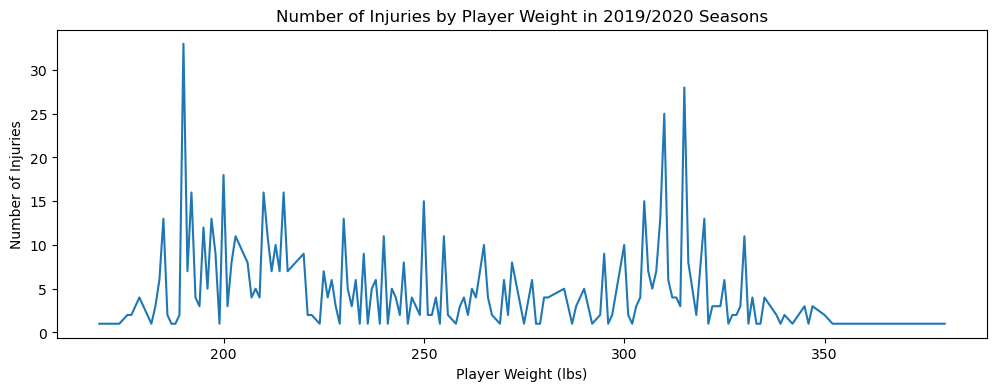

In [ ]:
# Line plot showing number of injuries by player weight in 2019/2020 seasons.
injuries_by_weight = injury_data.groupby('weight').size()

x = injuries_by_weight.index
y = injuries_by_weight.values

plt.figure(figsize=(12,4))
plt.plot(x, y)
plt.title('Number of Injuries by Player Weight in 2019/2020 Seasons')
plt.xlabel('Player Weight (lbs)')
plt.ylabel('Number of Injuries')
plt.show()

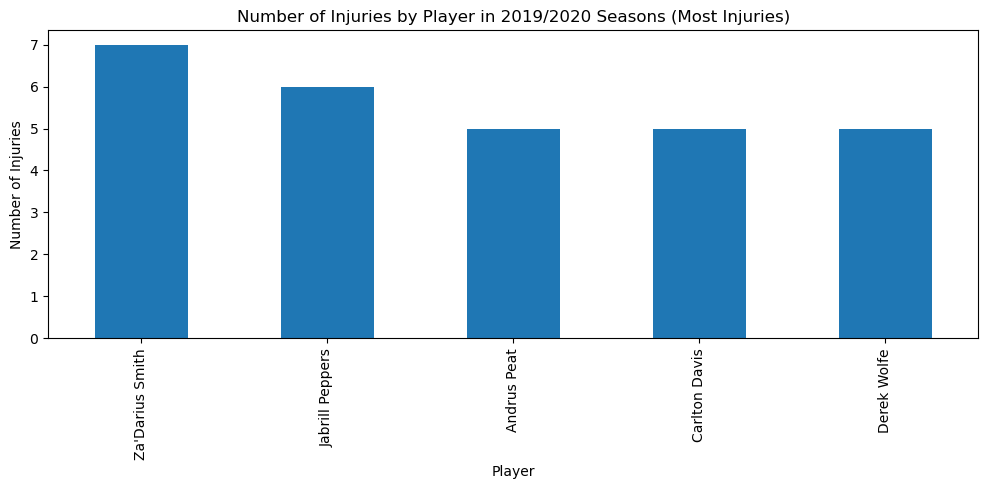

In [ ]:
# Bar chart showing the players with the most injuries in 2019/2020 seasons.
injury_data.full_name.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Player in 2019/2020 Seasons (Most Injuries)')
plt.xlabel('Player')
plt.ylabel('Number of Injuries')
plt.show()

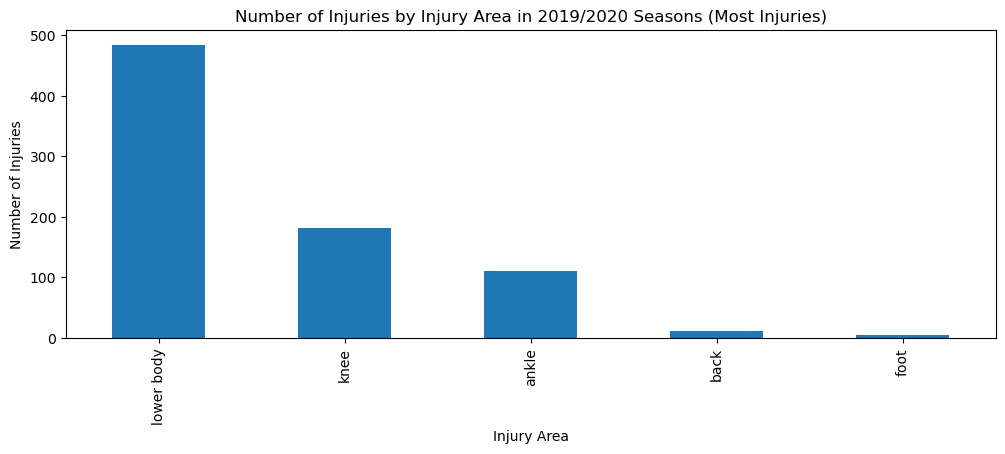

In [ ]:
# Bar chart showing the injury areas with the most injuries in 2019/2020 seasons.
injury_data.injury_area.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Injury Area in 2019/2020 Seasons (Most Injuries)')
plt.xlabel('Injury Area')
plt.ylabel('Number of Injuries')
plt.show()

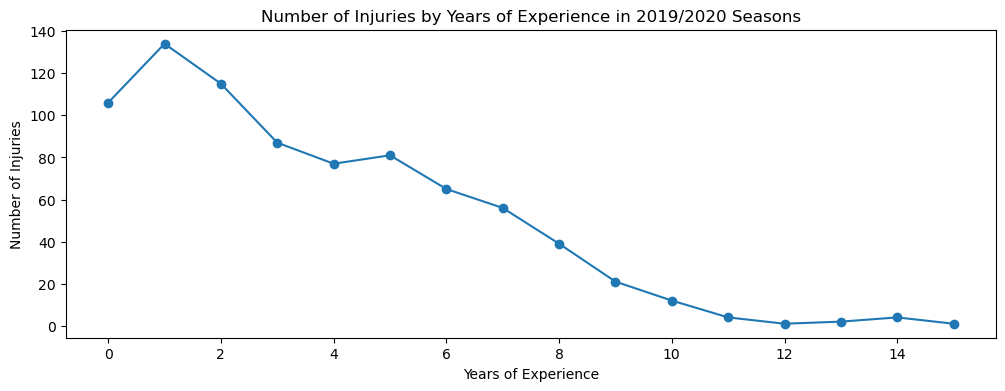

In [ ]:
# Line plot showing number of injuries by years of experience in 2019/2020 seasons.
injuries_by_age = injury_data.groupby('years_exp').size()

x = injuries_by_age.index
y = injuries_by_age.values

plt.figure(figsize=(12,4))
plt.plot(x, y, linestyle='-', marker='o')
plt.title('Number of Injuries by Years of Experience in 2019/2020 Seasons')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Injuries')
plt.show()

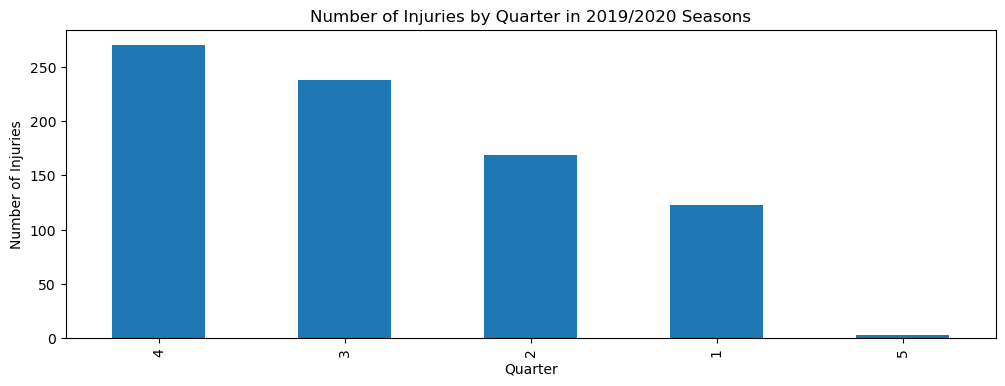

In [ ]:
# Bar chart showing number of injuries by quarter in 2019/2020 seasons.
injury_data.qtr.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Quarter in 2019/2020 Seasons')
plt.xlabel('Quarter')
plt.ylabel('Number of Injuries')
plt.show()

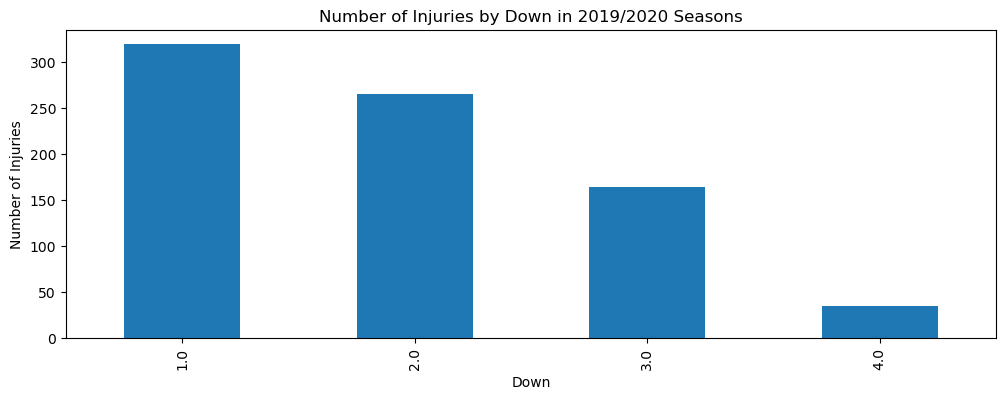

In [ ]:
# Bar chart showing number of injuries by down in 2019/2020 seasons.
injury_data.down.value_counts().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Down in 2019/2020 Seasons')
plt.xlabel('Down')
plt.ylabel('Number of Injuries')
plt.show()

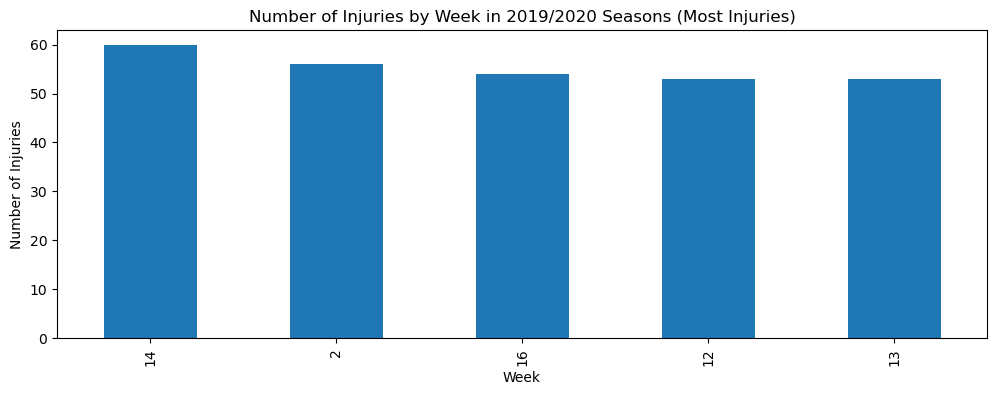

In [ ]:
# Bar chart showing most number of injuries by week in 2019/2020 seasons.
injury_data.week.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Week in 2019/2020 Seasons (Most Injuries)')
plt.xlabel('Week')
plt.ylabel('Number of Injuries')
plt.show()

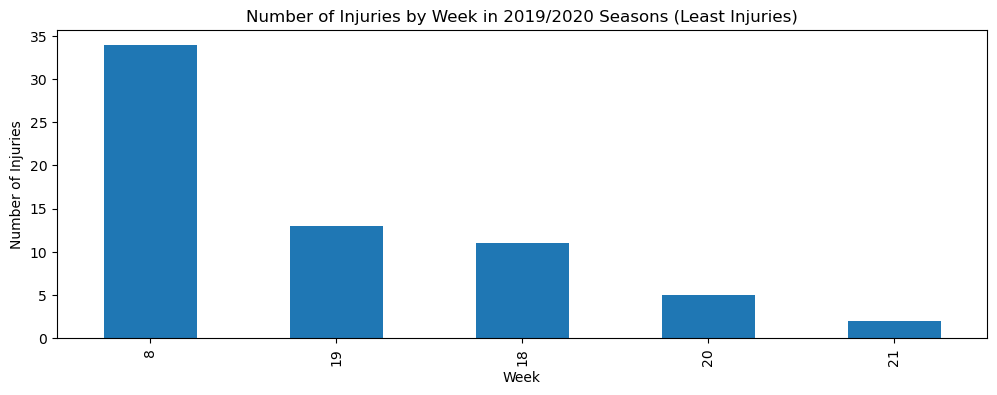

In [ ]:
# Bar chart showing least number of injuries by week in 2019/2020 seasons.
injury_data.week.value_counts().tail().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Week in 2019/2020 Seasons (Least Injuries)')
plt.xlabel('Week')
plt.ylabel('Number of Injuries')
plt.show()

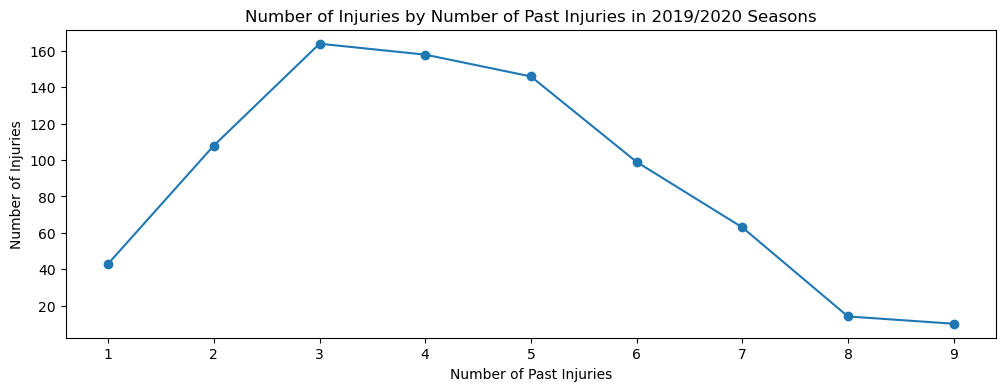

In [ ]:
# Line plot showing number of injuries by number of past injuries in 2019/2020 seasons.
injuries_by_past_injuries = injury_data.groupby('num_past_injuries').size()

x = injuries_by_past_injuries.index
y = injuries_by_past_injuries.values

plt.figure(figsize=(12,4))
plt.plot(x, y, linestyle='-', marker='o')
plt.title('Number of Injuries by Number of Past Injuries in 2019/2020 Seasons')
plt.xlabel('Number of Past Injuries')
plt.ylabel('Number of Injuries')
plt.show()

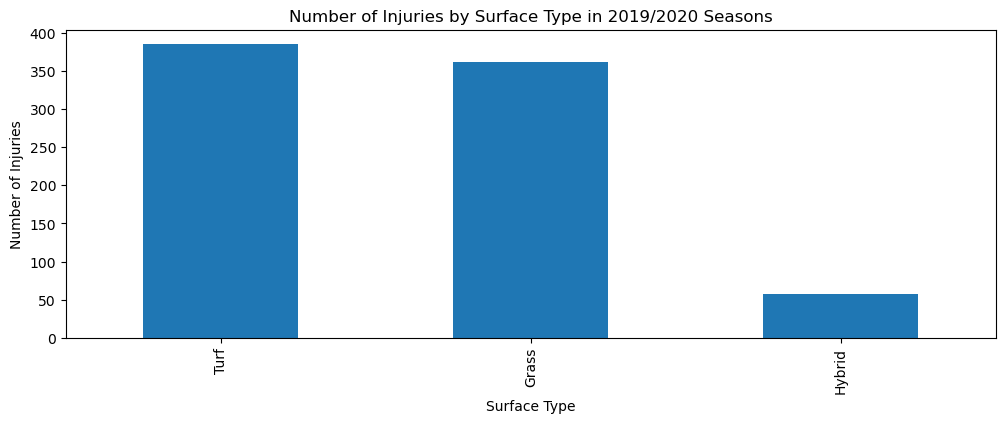

In [ ]:
# Bar chart showing number of injuries by surface type in 2019/2020 seasons.
injury_data.surface_type.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Surface Type in 2019/2020 Seasons')
plt.xlabel('Surface Type')
plt.ylabel('Number of Injuries')
plt.show()

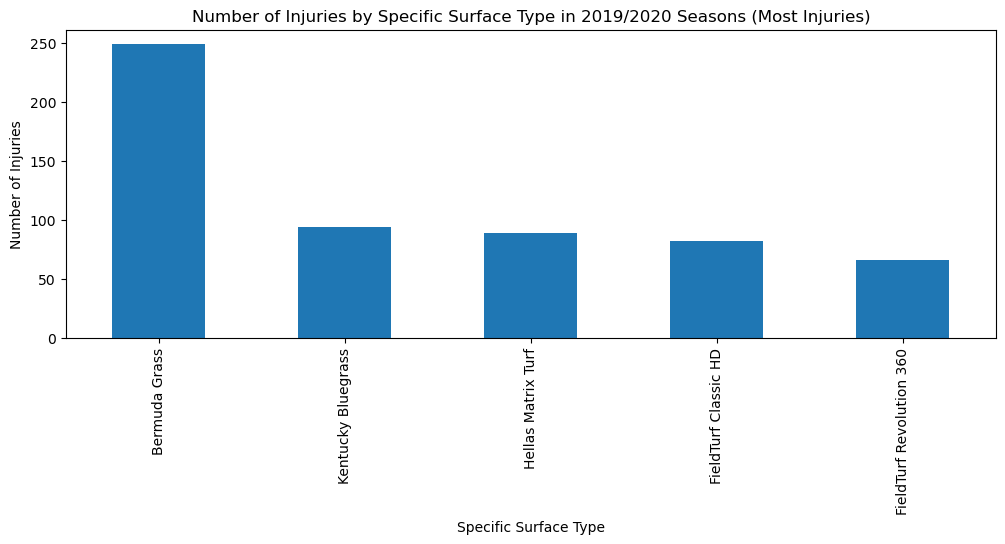

In [ ]:
# Bar chart showing most number of injuries by specific surface type in 2019/2020 seasons.
injury_data.surface.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Specific Surface Type in 2019/2020 Seasons (Most Injuries)')
plt.xlabel('Specific Surface Type')
plt.ylabel('Number of Injuries')
plt.show()

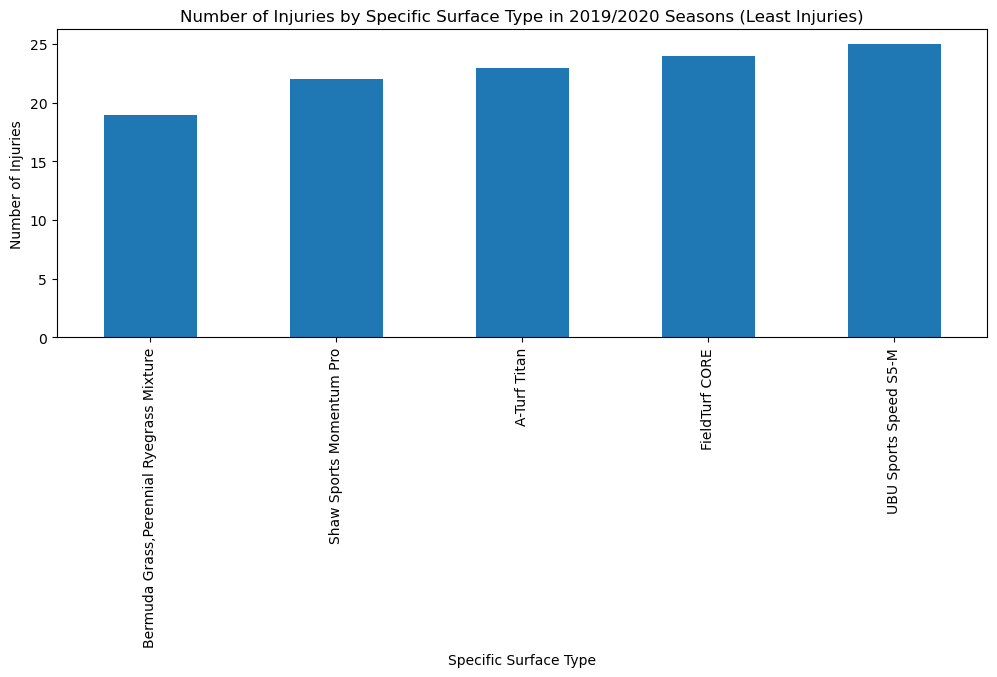

In [ ]:
# Bar chart showing least number of injuries by specific surface type in 2019/2020 seasons.
injury_data.surface.value_counts().tail().sort_values(ascending=True).plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Specific Surface Type in 2019/2020 Seasons (Least Injuries)')
plt.xlabel('Specific Surface Type')
plt.ylabel('Number of Injuries')
plt.show()

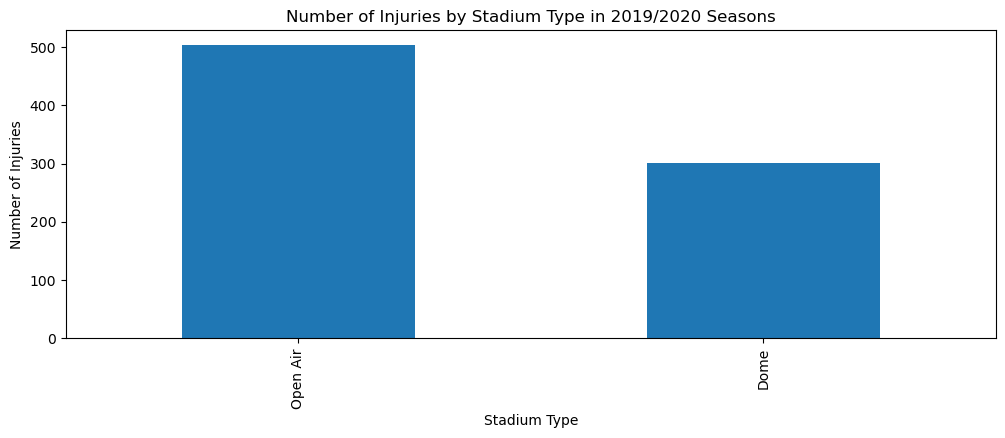

In [ ]:
# Bar chart showing number of injuries by stadium type in 2019/2020 seasons.
injury_data.stadium_type.value_counts().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Stadium Type in 2019/2020 Seasons')
plt.xlabel('Stadium Type')
plt.ylabel('Number of Injuries')
plt.show()

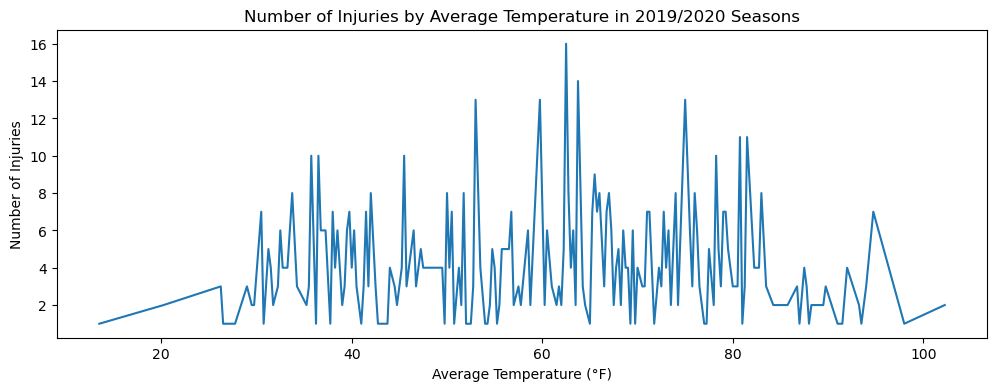

In [ ]:
# Line plot showing number of injuries by average temperature in 2019/2020 seasons.
injuryies_by_avg_temp = injury_data.groupby('Avg_Temp').size()

x = injuryies_by_avg_temp.index
y = injuryies_by_avg_temp.values

plt.figure(figsize=(12,4))
plt.plot(x, y)
plt.title('Number of Injuries by Average Temperature in 2019/2020 Seasons')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Number of Injuries')
plt.show()

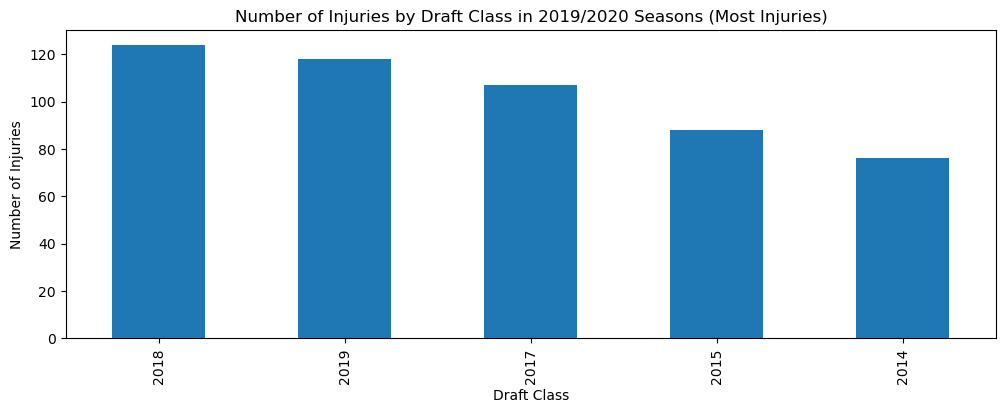

In [ ]:
# Bar chart showing most number of injuries by draft class in 2019/2020 seasons.
injury_data.entry_year.value_counts().head().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Draft Class in 2019/2020 Seasons (Most Injuries)')
plt.xlabel('Draft Class')
plt.ylabel('Number of Injuries')
plt.show()

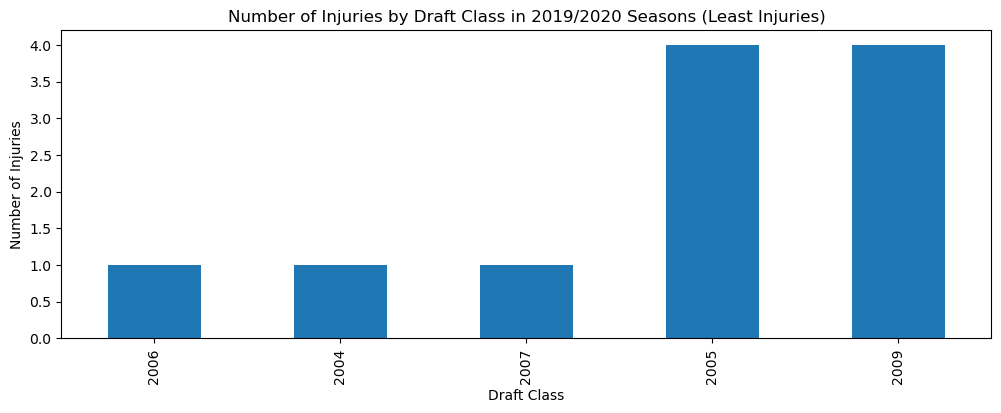

In [ ]:
# Bar chart showing least number of injuries by draft class in 2019/2020 seasons.
injury_data.entry_year.value_counts().tail().sort_values(ascending=True).plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Draft Class in 2019/2020 Seasons (Least Injuries)')
plt.xlabel('Draft Class')
plt.ylabel('Number of Injuries')
plt.show()

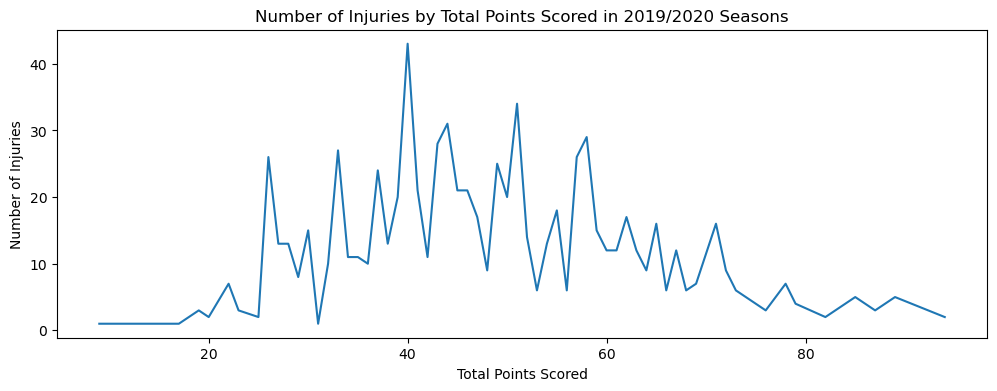

In [ ]:
# Line plot showing number of injuries by total points scored in 2019/2020 seasons.
injuries_by_total_pts = injury_data.groupby('total_pts').size()

x = injuries_by_total_pts.index
y = injuries_by_total_pts.values

plt.figure(figsize=(12,4))
plt.plot(x, y)
plt.title('Number of Injuries by Total Points Scored in 2019/2020 Seasons')
plt.xlabel('Total Points Scored')
plt.ylabel('Number of Injuries')
plt.show()

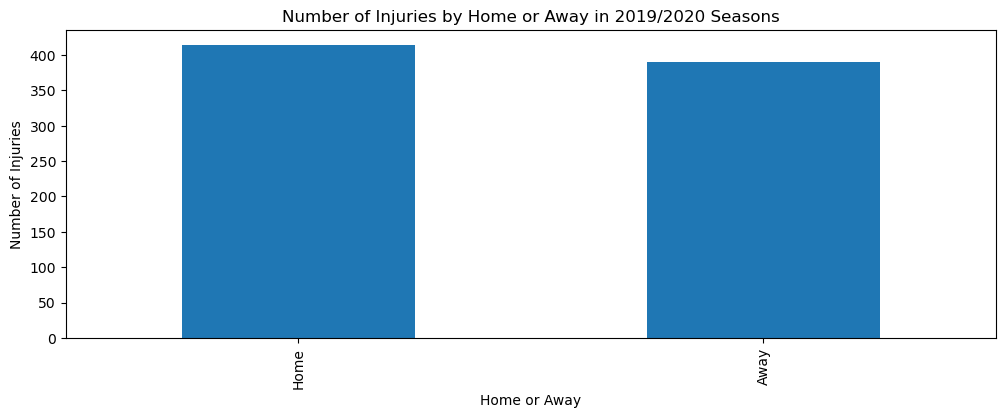

In [ ]:
# Bar chart showing number of injuries by home or away in 2019/2020 seasons.
injury_data.home_or_away.value_counts().plot(kind = 'bar', figsize=(12,4))
plt.title('Number of Injuries by Home or Away in 2019/2020 Seasons')
plt.xlabel('Home or Away')
plt.ylabel('Number of Injuries')
plt.show()

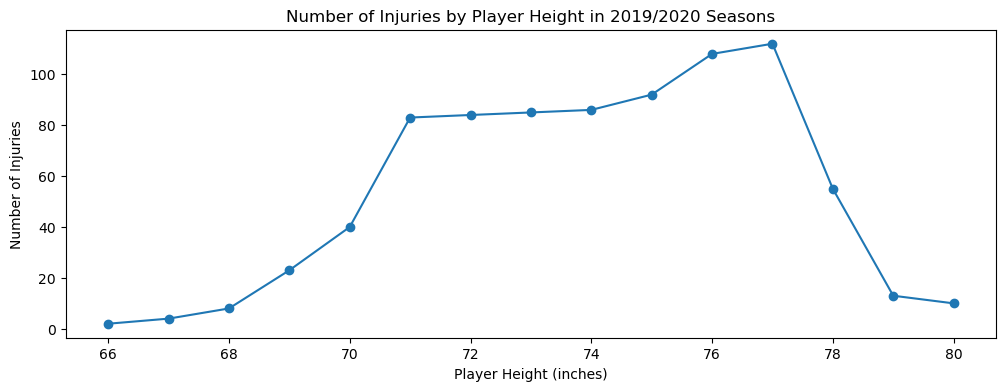

In [ ]:
# Line plot showing number of injuries by player height in 2019/2020 seasons.
injuries_by_height = injury_data.groupby('height').size()

x = injuries_by_height.index
y = injuries_by_height.values

plt.figure(figsize=(12,4))
plt.plot(x, y, linestyle='-', marker='o')
plt.title('Number of Injuries by Player Height in 2019/2020 Seasons')
plt.xlabel('Player Height (inches)')
plt.ylabel('Number of Injuries')
plt.show()

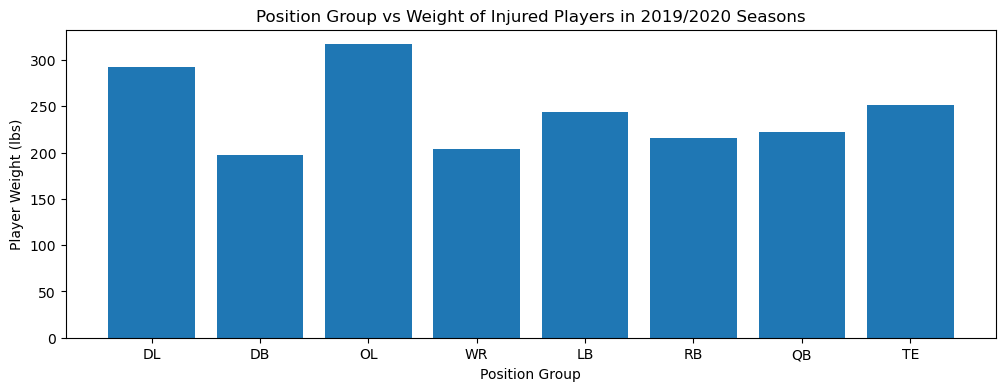

In [ ]:
# Bar chart showing Position Group vs Weight of Injured Players in 2019/2020 Seasons.
x = avg_position_injury_weight().keys()
y = avg_position_injury_weight().values()


plt.figure(figsize=(12,4))
plt.bar(x, y)
plt.title('Position Group vs Weight of Injured Players in 2019/2020 Seasons')
plt.xlabel('Position Group')
plt.ylabel('Player Weight (lbs)')
plt.show()

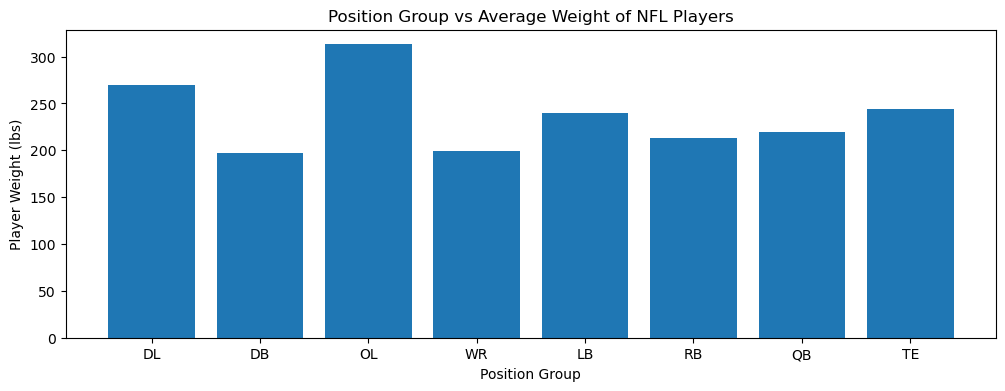

In [ ]:
# Bar chart showing Position Group vs Average Weight of NFL Players.
x = injury_data.position
y = injury_data.avg_position_weight

plt.figure(figsize=(12,4))
plt.bar(x, y)
plt.title('Position Group vs Average Weight of NFL Players')
plt.xlabel('Position Group')
plt.ylabel('Player Weight (lbs)')
plt.show()

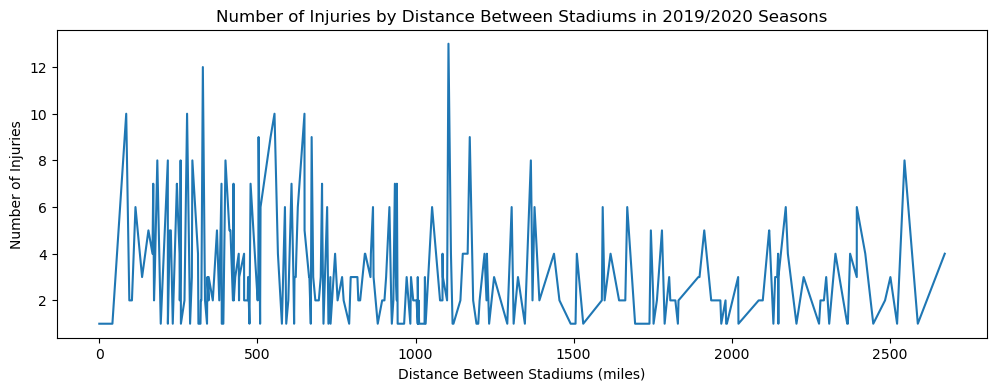

In [ ]:
# distance_miles column assumed to represent distance between each team's stadiums.
injuries_by_distance = injury_data.groupby('distance_miles').size()

x = injuries_by_distance.index
y = injuries_by_distance.values

# Line plot showing number of injuries by distance between stadiums in 2019/2020 seasons.
plt.figure(figsize=(12,4))
plt.plot(x, y)
plt.title('Number of Injuries by Distance Between Stadiums in 2019/2020 Seasons')
plt.xlabel('Distance Between Stadiums (miles)')
plt.ylabel('Number of Injuries')
plt.show()